# X-means

In [17]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer

In [18]:
# X-means function
def execute_xmeans(vecs,kmin,kmax):
    amount_initial_centers = kmin
    initial_centers = kmeans_plusplus_initializer(vecs, amount_initial_centers).initialize()

    xmeans_instance = xmeans(vecs, initial_centers, kmax)
    xmeans_instance.process()

    return xmeans_instance

## 1. Choix du vecteur

In [19]:
# Choose vector
doc_vectors = lsa_doc_vectors

# For title
vec_type = 'LSA'
vec_opt = dim_lsa

## 2. Lancement x-means

In [20]:
# X-means options
kmin,kmax = 10,200

In [21]:
# Execution X-means
xmeans_instance = execute_xmeans(doc_vectors,kmin,kmax)
xmeans_clusters_grouped = xmeans_instance.get_clusters()
xmeans_clusters = pd.Series({j : i for i,m in enumerate(xmeans_clusters_grouped) for j in m}).sort_index().values
xmeans_centers = xmeans_instance.get_centers()
xmeans_nb_clusters = len(xmeans_clusters_grouped)

In [22]:
# Scores
print("Nb clusters = {}, WCE = {:.2f},Calisnki-Harabasz = {:.2f}, Davies-Bouldin = {:.2f}".format(
    xmeans_nb_clusters,
    xmeans_instance.get_total_wce(),
    calinski_harabasz_score (doc_vectors ,xmeans_clusters),
    davies_bouldin_score (doc_vectors ,xmeans_clusters)))

Nb clusters = 52, WCE = 34.74,Calisnki-Harabasz = 189.19, Davies-Bouldin = 1.09


## 3. Affichage UMAP

In [181]:
# Embedding umap
embedding = UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(doc_vectors)

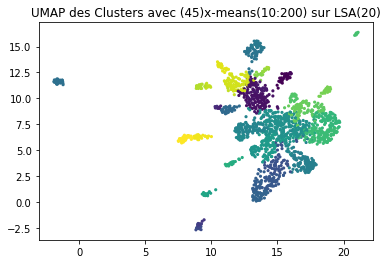

In [182]:
# Affichage
plt.scatter(embedding[:, 0], embedding[:, 1], 
    c = xmeans_clusters,
    s = 10, # size
    edgecolor='none')
plt.title("UMAP des Clusters avec ({})x-means({}:{}) sur {}({})".format(xmeans_nb_clusters,kmin,kmax,vec_type,vec_opt));